In [2]:
from IPython.display import Image, display, HTML, Video
import ipyplot
import os
import os.path as osp
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
# https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell
# https://stackoverflow.com/questions/55303216/pycharm-jupyter-notebook-wsl-jupyter-package-is-not-installed

In [3]:
model_key = '20210125_002517' 
directory = f"../models/"
for filename in os.listdir(directory):
    print(filename)
    if filename.startswith(model_key):
      path = osp.join(directory, filename)
      print(path)
      break
[_, _, data_name, blck, fct] = path.split("_")
modelfolder = f"{directory}{model_key}_{data_name}_{blck}_{fct}"
modelpath = f"{modelfolder}/model_{model_key}"

.DS_Store
20210125_002517_CIFAR_constant_laplacian
../models/20210125_002517_CIFAR_constant_laplacian


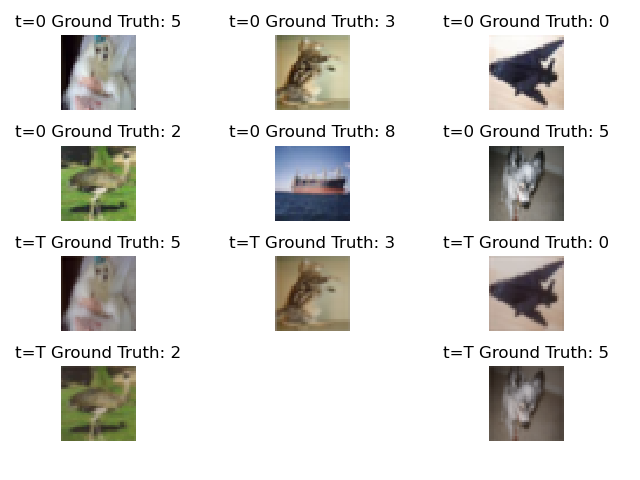

In [4]:
image_file = f"{modelpath}_imageT.png"
Image(filename=image_file) 

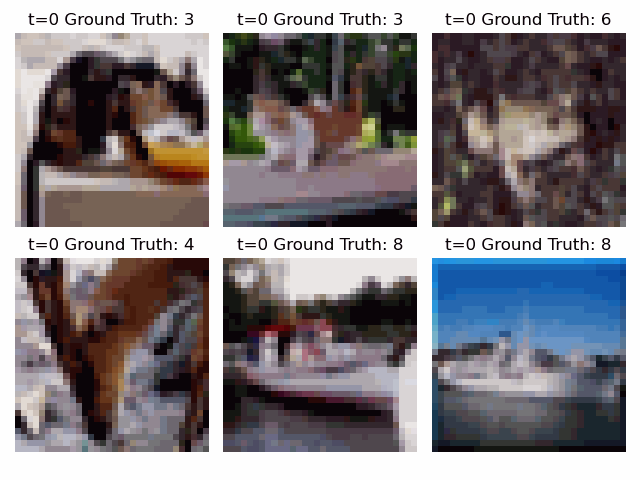

In [5]:
image_file = f"{modelpath}_animation.gif"
Image(filename=image_file) 

In [6]:
images_0 = []
images_T = []
animations = []
maxmin = []
labels = []
directory = f"../models/"
for model in os.listdir(directory):
    if model.startswith("2021"):
        path = os.path.join(directory, model)
        [date, time, data_name, blck, fct] = path.split("_")
        model_key = f"{date}_{time}"        
        for i in range(10):
            labels.append(f"{data_name}_{blck}_{fct}")
            images_0.append(f"{path}/image_0/image_0_{i}.png")
            images_T.append(f"{path}/image_10/image_10_{i}.png")
            animations.append(f"{path}/animations/animation{i}.gif")
            maxmin.append(f"{path}/maxmin/max_min_{i}.png")            

In [7]:
# %%HTML
# ("""
# <video width="320" height="240" controls>
#     <source src="models/20210125_115601_CIFAR_attention_laplacian/model_20210125_115601_animation3.mp4" type="video/mp4">
# </video>    
# """)

In [8]:
ipyplot.plot_class_tabs(images_0, labels, max_imgs_per_tab=10, img_width=150)

In [9]:
ipyplot.plot_class_tabs(images_T, labels, img_width=150)

In [10]:
ipyplot.plot_class_tabs(animations, labels, img_width=150)

In [11]:
ipyplot.plot_class_tabs(maxmin, labels, img_width=150)